## Exercise 3

### Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

elections = pd.read_csv('elections.csv')
elections.head()

,year,state,county,rep,dem,other
0,1960,alabama,autauga,1149,1324,89
1,1960,alabama,baldwin,4812,5647,187
2,1960,alabama,barbour,1166,2148,37
3,1960,alabama,bibb,1052,1697,4
4,1960,alabama,blount,2557,3404,19


In [2]:
# two-party vote share
elections['Dem'] = elections['dem'] / (elections['dem'] + elections['rep'])
elections['Rep'] = elections['rep'] / (elections['dem'] + elections['rep'])

# assign red and blue colors based on two-party vote share
elections['color'] = np.where(elections['Rep'] > elections['Dem'], 'r', 'b')

# add tuples of rgb values based on two-party vote share
elections['color_p'] = elections.apply(lambda x: (x['Rep'], 0, x['Dem']), axis=1)

In [3]:
import geopandas as gpd

# read in the shapefile (.shp) of the U.S. counties
usa_county = gpd.read_file('cb_2022_us_county_500k/cb_2022_us_county_500k.shp')

type(usa_county) # a GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [4]:
usa_county.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,069,00161560,0500000US01069,01069,Houston,Houston County,AL,Alabama,06,1501742235,4795415,"POLYGON ((-85.71209 31.19727, -85.70934 31.198..."
1,01,023,00161537,0500000US01023,01023,Choctaw,Choctaw County,AL,Alabama,06,2365900083,19114321,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,005,00161528,0500000US01005,01005,Barbour,Barbour County,AL,Alabama,06,2292160151,50523213,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
3,01,107,00161580,0500000US01107,01107,Pickens,Pickens County,AL,Alabama,06,2282835044,22621093,"POLYGON ((-88.34043 32.99120, -88.33101 33.072..."
4,01,033,00161542,0500000US01033,01033,Colbert,Colbert County,AL,Alabama,06,1535742270,79160396,"POLYGON ((-88.13925 34.58779, -88.13872 34.589..."


In [5]:
# merge the 'usa_county' GeoDataFrame and the colors from 'elec08' on state abbreviations

# lower the county names so that we can join on two dataframes
usa_county['county_lower'] = usa_county['NAME'].str.lower()

usa_county2 = pd.merge(
    usa_county, elections[['county', 'color', 'color_p', 'year']],
    left_on='county_lower', right_on='county', how='left'
).drop('county', axis='columns')

usa_county2.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'county_lower', 'color', 'color_p', 'year'],
      dtype='object')

(-115.10507435, -108.75665864999999, 31.048572850000003, 37.287864150000004)

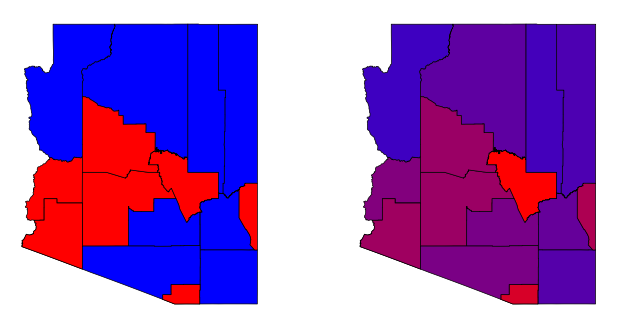

In [6]:
# Arizona
fig, axs = plt.subplots(1, 2, figsize=(8,4))

# blue and red colored map according to the winning party in 2008
usa_county2[(usa_county2.STATE_NAME=='Arizona') & (usa_county2.year==2008)].plot(ax=axs[0], color=usa_county2['color'], edgecolor='black', 
              linewidth=0.5).axis('off')

# purple-colored map according to the vote share in 2008
usa_county2[(usa_county2.STATE_NAME=='Arizona') & (usa_county2.year==2008)].plot(ax=axs[1], color=usa_county2['color_p'], edgecolor='black', 
              linewidth=0.5).axis('off')

(-73.68712945, -69.74940555, 41.15553275, 42.96902025)

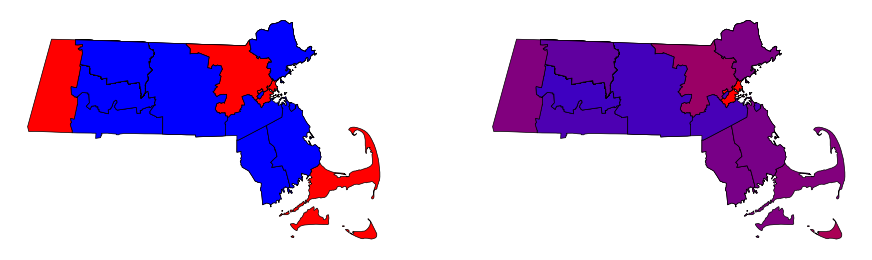

In [7]:
# Massachusetts
fig, axs = plt.subplots(1, 2, figsize=(11,5))

# blue and red colored map according to the winning party
usa_county2[(usa_county2.STATE_NAME=='Massachusetts') & (usa_county2.year==2008)].plot(ax=axs[0], color=usa_county2['color'], edgecolor='black', 
              linewidth=0.5).axis('off')

# purple-colored map according to the vote share
usa_county2[(usa_county2.STATE_NAME=='Massachusetts') & (usa_county2.year==2008)].plot(ax=axs[1], color=usa_county2['color_p'], edgecolor='black', 
              linewidth=0.5).axis('off')

### Question 2

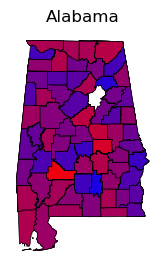

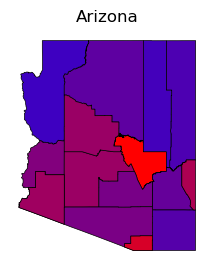

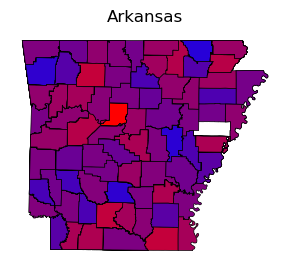

In [8]:
# purple-colored map according to the vote share

for state_name in usa_county2['STATE_NAME'].unique():

        # I break the loop here due to the limited space
    if state_name == 'California':
        break
        
    fig, ax = plt.subplots(1,1, figsize=(5, 3))
    
    usa_county2[(usa_county2.STATE_NAME==state_name) & (usa_county2.year==2008)].plot(ax=ax, color=usa_county2['color_p'], edgecolor='black', 
            linewidth=0.5).set(title=state_name)
    
    ax.set_axis_off()



### Question 3

In [9]:
# define a function to plot election results of a given state in a given year according to the vote share
def election_map(data, year, state, ax=None): 
    year_sub = data.loc[data['year'] == year]

    year_state_sub = year_sub[(year_sub.STATE_NAME==state) & (year_sub.year==year)]
    
    year_state_sub.plot(ax=ax, color=year_state_sub['color_p'], edgecolor='black', linewidth=0.5, aspect=1)

    ax.set_axis_off()
    ax.set_title(f'{year, state}')

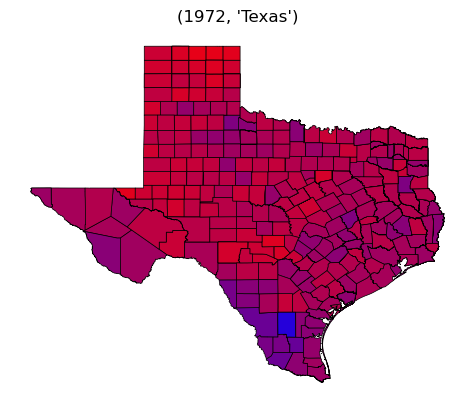

In [10]:
# check if the defined func works correctly
fig, ax = plt.subplots()

election_map(usa_county2, 1972, 'Texas', ax)

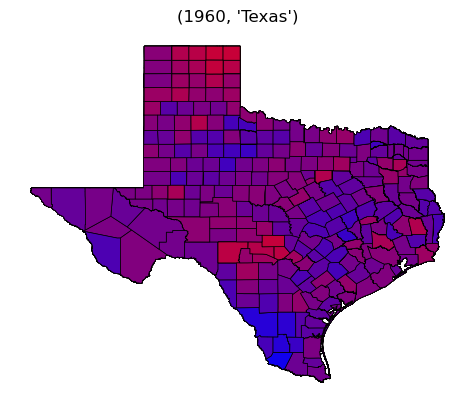

In [11]:
# Animation using FuncAnimation
from matplotlib.animation import FuncAnimation

years = elections['year'].unique()

fig, ax = plt.subplots()

ani = FuncAnimation(
    fig, lambda year: election_map(usa_county2, year, 'Texas', ax), 
     frames=years, repeat=False)

ani.save('elections.html', writer='html', fps=2)


### Question 4

In [12]:
# calculate total republican and democratic votes for each state

states_grouped = elections.groupby('state').sum(numeric_only=True).reset_index()

elections = elections.merge(states_grouped[['state', 'rep', 'dem']], 
                            left_on='state', right_on='state', how='left', suffixes=('', '_total'))
elections.head()

,year,state,county,rep,dem,other,Dem,Rep,color,color_p,rep_total,dem_total
0,1960,alabama,autauga,1149,1324,89,0.535382,0.464618,b,"(0.46461787302871005, 0, 0.53538212697129)",10649919,7515020
1,1960,alabama,baldwin,4812,5647,187,0.539918,0.460082,b,"(0.46008222583420977, 0, 0.5399177741657902)",10649919,7515020
2,1960,alabama,barbour,1166,2148,37,0.648159,0.351841,b,"(0.35184067592033796, 0, 0.648159324079662)",10649919,7515020
3,1960,alabama,bibb,1052,1697,4,0.617315,0.382685,b,"(0.3826846125863951, 0, 0.6173153874136049)",10649919,7515020
4,1960,alabama,blount,2557,3404,19,0.571045,0.428955,b,"(0.42895487334339877, 0, 0.5710451266566012)",10649919,7515020


<div>
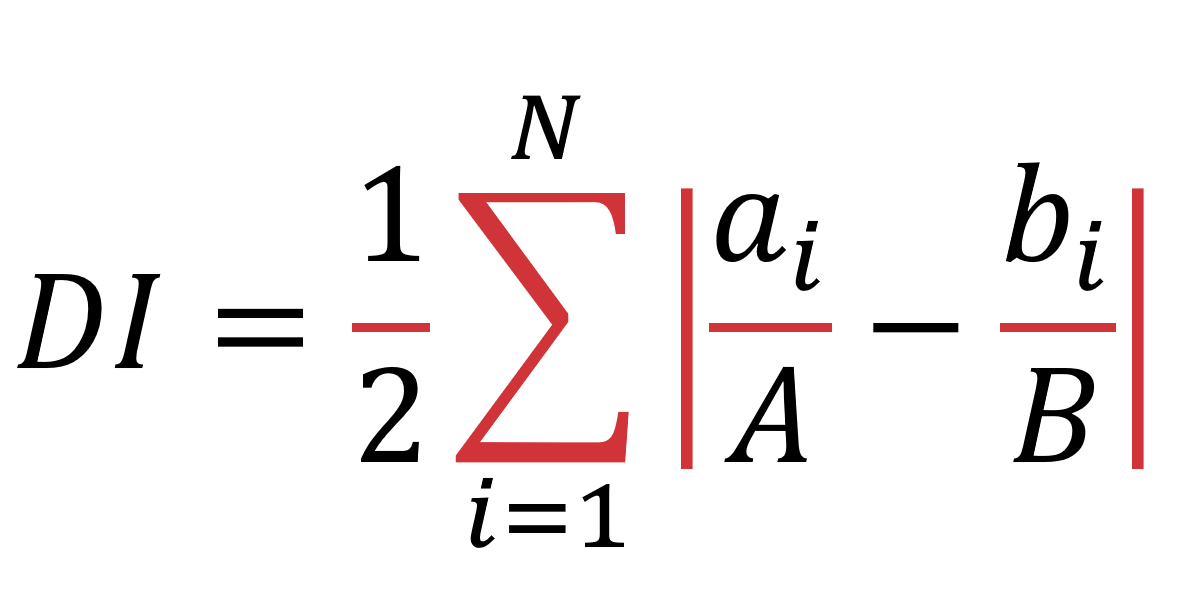
</div>

In the formula, a i (b i ) is the number of Democratic (Republican) votes in the
i th county and A (B) is the total number of Democratic (Republican) votes in
the state. N represents the number of counties.

In [13]:
# calculate dissimilarity index for each county and insert as a column 
# 1/2 calculation in the formula is executed below
elections['dissim_index'] = abs(((elections['dem'] / elections['dem_total']) - (elections['rep'] / elections['rep_total'])))

In [14]:
# the 5 most segregated states
(elections.groupby('state').sum(numeric_only=True)['dissim_index'] / 2).sort_values(ascending=False).head()

state
georgia        0.274590
maryland       0.265662
mississippi    0.251954
utah           0.250991
new york       0.241921
Name: dissim_index, dtype: float64

In [15]:
# the 5 least segregated states
(elections.groupby('state').sum(numeric_only=True)['dissim_index'] / 2).sort_values().head()

state
arizona          0.123722
iowa             0.144828
minnesota        0.146456
massachusetts    0.151670
maine            0.152589
Name: dissim_index, dtype: float64

### Question 5

In [16]:
# create the 'dem_percentage' and calculate percentage of democratic votes in each county
elections['dem_percentage'] = round((elections['dem'] / (elections['dem'] + elections['rep'])) * 100, 2)

In [17]:
# define function to calculate Gini coefficient
# source: https://www.statology.org/gini-coefficient-python/
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [18]:
# try out the gini func
gini(elections[elections.state == 'alabama']['dem_percentage'])

0.26804699808184956

In [19]:
# create an empty gini column
elections['gini'] = ''

# for subset of each state, calculate gini and fill the value into the gini column
for s in elections['state'].unique():
    # pass the subset into the gini func
    gini_num = gini(elections[elections.state == s]['dem_percentage'])
    # fill in the value
    elections.loc[elections.state == s, 'gini'] = gini_num

In [20]:
elections['gini'] = pd.to_numeric(elections['gini'])

# find the greatest and lowest value of index for the 2008 elections 
elections2008 = elections[elections.year==2008]
print('Greatest value of index:\n', elections2008.loc[elections2008['gini'].idxmax(), ['state','gini']], '\n')
print('Lowest value of index:\n', elections2008.loc[elections2008['gini'].idxmin(), ['state','gini']])

Greatest value of index:
 state     alabama
gini     0.268047
Name: 37281, dtype: object 

Lowest value of index:
 state    rhode island
gini         0.085653
Name: 39557, dtype: object


In [21]:
# mapping the results

usa_state = gpd.read_file('cb_2022_us_state_500k/cb_2022_us_state_500k.shp')

# make some data editings first

# lower the state names for joining purposes
usa_state['state_lower'] = usa_state['NAME'].str.lower()

# extract the continental 
non_cont = ['Alaska', 'Hawaii', 'Puerto Rico', 'United States Virgin Islands',
            'Commonwealth of the Northern Mariana Islands', 'Guam', 
            'American Samoa']

usa_cont_state = usa_state.loc[~usa_state['NAME'].isin(non_cont)].copy().reset_index(drop=True)

# merge usa_state dataframe with the 'gini' column of elections2008
# extract 'gini' column from elections2008 dataframe and groupby 'state' column (because we want this info in state level)
df = elections2008.groupby('state').mean(numeric_only=True)['gini'].reset_index()

usa_cont_state2008 = pd.merge(usa_cont_state, df, left_on='state_lower', right_on='state', how='left')
usa_cont_state2008.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'state_lower', 'state', 'gini'],
      dtype='object')

(-127.65372665000001, -64.05923634999999, 23.2781513, 50.6275107)

<Figure size 640x480 with 0 Axes>

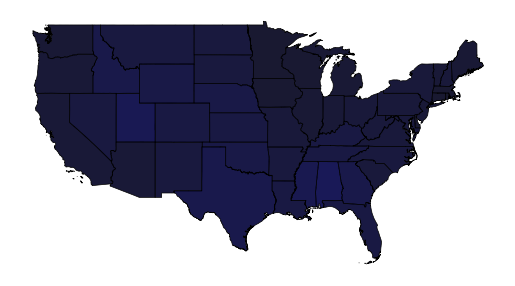

In [22]:
# add tuples of rgb values based on gini num
usa_cont_state2008['color_gini'] = usa_cont_state2008.apply(lambda x: ((0, 0, round(x['gini'], 2), 0.9)), axis=1)

plt.figure()

usa_cont_state2008.plot(color=usa_cont_state2008['color_gini'], edgecolor='black', 
              linewidth=0.5).axis('off')

In [23]:
# the correlation between the Gini index and the dissimilarity index
(elections2008['gini']).corr(elections2008['dissim_index'])

-0.019691885968075164

### Question 6

Lastly, we examine how the degree of political segregation has changed in each
state over time. Use animation to visualize these changes. Briefly comment on the
patterns you observe.

In [24]:
# preparing the dataset 
# the loop takes subset from elections dataframe, merges it with a copy usa_cont_state dataframe 
usa_cont_state_allyears = pd.DataFrame()

for year in elections['year'].unique():
    
    # take subset from elections dataframe according to year
    year_sub = elections[elections.year == year].groupby('state').mean(numeric_only=True)[['gini', 'year']].copy().reset_index()
    
    # merge it with with a copy usa_cont_state dataframe 
    usa_cont_state_copy = usa_cont_state.copy()
    df = pd.merge(usa_cont_state_copy, year_sub, left_on='state_lower', right_on='state', how='left')
    
    # concatinate all the years under each other 
    usa_cont_state_allyears =  pd.concat([usa_cont_state_allyears, df], axis=0)

usa_cont_state_allyears.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state_lower,state,gini,year
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198573403,726463825,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",new mexico,new mexico,0.160522,1960.0
1,46,01785534,0400000US46,46,SD,South Dakota,00,196341552329,3387681983,"POLYGON ((-104.05788 44.99761, -104.05078 44.9...",south dakota,south dakota,0.157532,1960.0
2,06,01779778,0400000US06,06,CA,California,00,403673617862,20291712025,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",california,california,0.127904,1960.0
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266581101,2384240769,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",kentucky,kentucky,0.183762,1960.0
4,01,01779775,0400000US01,01,AL,Alabama,00,131185042550,4582333181,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",alabama,alabama,0.268047,1960.0


In [25]:
# add tuples of rgb values based on gini num
usa_cont_state_allyears['color_gini'] = usa_cont_state_allyears.apply(lambda x: ((0, 0, round(x['gini'], 2), 0.9)), axis=1)

In [26]:
def election_map2(data, year, ax=None): 
    year_sub = data.loc[data['year'] == year]
    year_sub.plot(ax=ax, color=year_sub['color_gini'], edgecolor='black', linewidth=0.5, aspect=1)
    
    ax.set_axis_off()
    ax.set_title(f'{year}')
    

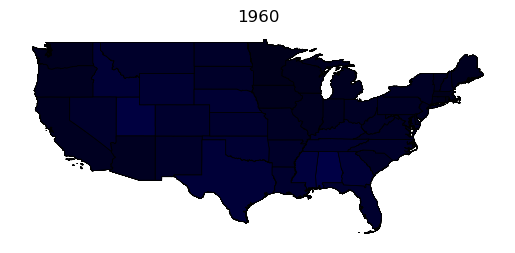

In [27]:
# animation

years = elections['year'].unique()

fig, ax = plt.subplots()

ani = FuncAnimation(fig, lambda year: election_map2(usa_cont_state_allyears, year, ax), frames=years, repeat=False)

ani.save('elections2.html', writer='html', fps=2)